In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

plt.style.use('ggplot')

In [2]:
# Unzipping the limited dataset
# The original data has been limited to just 4 categories: 'angry', 'happy', 'neutral', and 'sad'

# !unzip ./content/limited.zip

In [3]:
# Test and train directories
train_dir = './limited/train'
test_dir = './limited/test'


# Train count
train_expression_list = [expression for expression in os.listdir(train_dir)]
train_count_dict = {}
for expression in train_expression_list:
    train_count_dict[expression] = len(
        os.listdir(train_dir + '/' + expression))


# Test count
test_expression_list = [expression for expression in os.listdir(test_dir)]
test_count_dict = {}
for expression in test_expression_list:
    test_count_dict[expression] = len(os.listdir(test_dir + '/' + expression))

print("Train")
print(train_count_dict)
print()
print('Test')
print(test_count_dict)

Train
{'angry': 3995, 'happy': 7215, 'neutral': 4965, 'sad': 4830}

Test
{'angry': 958, 'happy': 1774, 'neutral': 1233, 'sad': 1247}


In [4]:
# Generating data from the images

train_datagen = ImageDataGenerator(rescale=1./255,
                                   height_shift_range=0.1,
                                   width_shift_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=20)

train_set = train_datagen.flow_from_directory(train_dir,
                                              batch_size=32,
                                              target_size=(48, 48),
                                              shuffle=True,
                                              color_mode='grayscale',
                                              class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            target_size=(48, 48),
                                            shuffle=True,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 21005 images belonging to 4 classes.
Found 5212 images belonging to 4 classes.


In [5]:
# Checking the indicies for each expression

train_set.class_indices

{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}

In [6]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 padding='same', input_shape=(48, 48, 1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(4, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0

In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=4)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5,
                               verbose=1)
tensorboard = TensorBoard(log_dir="logs", write_graph=True, write_images=True)
checkpoint = ModelCheckpoint('limited-set-best.h5', monitor='val_accuracy',
                             save_best_only=True, mode='auto')

In [10]:
history = model.fit(x=train_set, validation_data=test_set, epochs=15,
                    callbacks=[early_stop, lr_reducer, tensorboard,
                               checkpoint], verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 657 steps, validate for 163 steps
Epoch 1/15
657/657 [==============================] - 116s 177ms/step - loss: 1.3585 - accuracy: 0.3443 - val_loss: 1.3165 - val_accuracy: 0.3858
Epoch 2/15
657/657 [==============================] - 32s 48ms/step - loss: 1.2774 - accuracy: 0.4078 - val_loss: 1.1461 - val_accuracy: 0.4871
Epoch 3/15
657/657 [==============================] - 32s 49ms/step - loss: 1.1580 - accuracy: 0.4710 - val_loss: 1.0468 - val_accuracy: 0.5447
Epoch 4/15
657/657 [==============================] - 32s 48ms/step - loss: 1.0798 - accuracy: 0.5188 - val_loss: 1.0159 - val_accuracy: 0.5432
Epoch 5/15
657/657 [==============================] - 32s 49ms/step - loss: 1.0124 - accuracy: 0.5582 - val_loss: 0.9821 - val_accuracy: 0.5714
Epoch 6/15
657/657 [==============================] - 32s 49ms/step - loss: 0.9432 - accuracy: 0.5944 - val_loss: 0.8669 - val_accuracy: 0.6376
Epoch 7/15
657/657 [====================

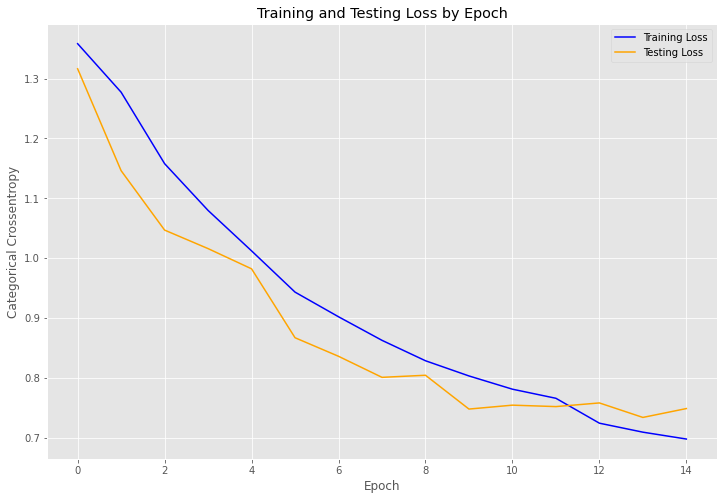

In [12]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(test_loss, label='Testing Loss', color='orange')
plt.title('Training and Testing Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy')
plt.legend();

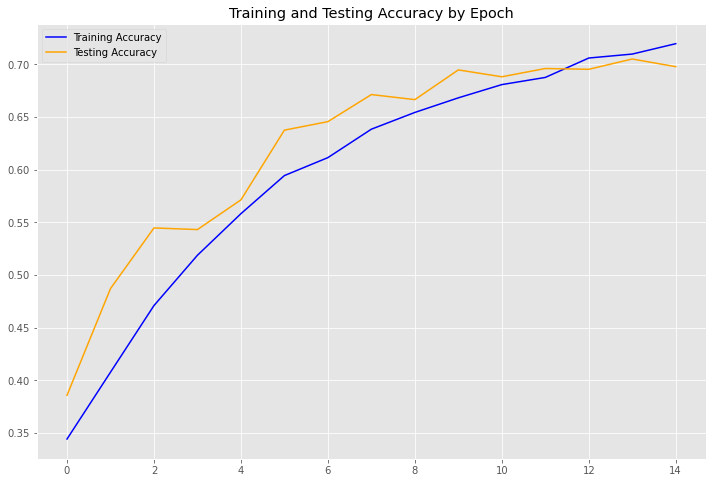

In [13]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(test_acc, label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy by Epoch')
plt.legend();